# Capstone Project - The Battle of the Neighborhoods

### Applied Data Science Capstone by IBM/Coursera

## Opening a new vegetarian / vegan restaurant in Singapore

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion and Recommendation](#recommendation)
* [Conclusion](#conclusion)
* [Limitation and Future Work](#limitation)
* [References](#references)

## Introduction: Business Problem <a name="introduction"></a>

Long gone are the days where you’ll get a confused look accompanied by “huh?” or “what?” when you talk about the vegan lifestyle. Vegans abstain from any animal products whereas vegetarians still consume dairy and eggs. While some people give up animal products for moral or environmental reasons, many do so to adopt a healthier lifestyle. Scientific research has shown that vegetarians are generally less prone to 4 major ailments: Cancer, Diabetes, Meat-based illnesses and Cardiovascular diseases. Over the last few years, climate change has been a hot topic and the push towards veganism has been sprouting alongside it. 
Veganism is gaining ground in Singapore. Singapore was named sixth most vegan-friendly city in the world by HappyCow. There are currently over 700 restaurants offering vegan and vegetarian dining options in Singapore, according to the HappyCow app, which lists vegan and vegetarian restaurants and health food stores around the world.
With PETA Asia declaring Singapore the second most vegan-friendly city in the region, just losing out to Taiwan’s capital Taipei in the top spot, and beating Bangalore, Bangkok and Bali, which all made the top 10. In addition to a growing appetite for plant-based innovations on the island, the boom in vegan, alternative and inclusive eateries in the city-state makes it a natural pathway for those wishing to enter the Asia market. We believe there is room for opportunity to start a new vegetarian / vegan restaurant in Singapore.

The objective of this capstone project is to analyse and select the best districts in Singapore to open a new vegetarian/vegan restaurant. 
Using data science methodology and machine learning techniques like clustering, this project aims to provide solutions to answer the business question: 
In Singapore, if entrepreneurs are looking to open a new vegetarian/vegan restaurant, where would you recommend that they open it? 

This project is particularly useful to entrepreneurs looking to open a new vegetarian / vegan restaurant in Singapore. 

## Data <a name="data"></a>

To solve the problem, we will need the following data: 

• List of districts in Singapore. 

• Latitude and longitude coordinates of those districts. This is required in order to plot the map and to get the venue data. 

• Venue data, particularly data related to vegetarian/vegan restaurants. We will use this data to perform clustering on the districts. 


Sources of data and methods to extract them :

This keylocations page (https://keylocation.sg/singapore/districts-map) contains a list of districts in Singapore, with a total of 28 districts. We will use web scraping techniques to extract the data from the keylocations page, with the help of Python requests and beautifulsoup packages. Then we will get the geographical coordinates of the districts using Python Geocoder package which will give us the latitude and longitude coordinates of the districts. 
After that, we will use Foursquare API to get the venue data for those districts. Foursquare has one of the largest database of 105+ million places and is used by over 150,000 developers. Foursquare API will provide many categories of the venue data, we are particularly interested in the vegetarian/vegan restaurant category in order to help us to solve the business problem put forward. 
This is a project that will make use of many data science skills, from web scraping (keylocations page), working with API (Foursquare), data cleaning, data wrangling, to machine learning (K-means clustering) and map visualization (Folium). 
In the next section, we will present the Methodology section where we will discuss the steps taken in this project, the data analysis that we did and the machine learning technique that was used.

### 1. Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print("Libraries imported.")

Libraries imported.


### 2. Scrap data from keylocations page into a DataFrame

In [2]:
# send the GET request
data = requests.get('https://keylocation.sg/singapore/districts-map').text

In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
# view beautifulsoup object with tags that are nested in the document
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="Interactive map of Singapore Districts, with ability to pan and zoom in to high detail and a full guide to Singapore districts with all basic information." name="description"/>
  <title>
   Interactive Singapore District Map and Guide
  </title>
  <meta content="Interactive Singapore District Map and Guide" property="og:title"/>
  <meta content="Interactive map of Singapore Districts, with ability to pan and zoom in to high detail and a full guide to Singapore districts with all basic information." property="og:description"/>
  <meta content="https://keylocation.sg/public/assets/_global/icon-708f20a.png" property="og:image"/>
  <meta content="website" property="og:type"/>
  <meta content="

In [5]:
# find all tables in beautifulsoup object
soup.find_all('table')

[<table class="table table-striped"><thead><tr><th>District</th><th>Areas</th><th>Location</th></tr></thead><tbody><tr><td>1</td><td>Marina Area</td><td>Boat Quay, Chinatown, Havelock Road, Marina Square, Raffles Place, Suntec City</td></tr><tr><td>2</td><td>CBD</td><td>Anson Road, Chinatown, Neil Road, Raffles Place, Shenton Way, Tanjong Pagar</td></tr><tr><td>3</td><td>Central South</td><td>Alexandra Road, Tiong Bahru, Queenstown</td></tr><tr><td>4</td><td>Keppel</td><td>Keppel, Mount Faber, Sentosa, Telok Blangah</td></tr><tr> <td>5</td><td>South West</td><td>Buona Vista, Dover, Pasir Panjang, West Coast</td></tr><tr><td>6</td><td>City Hall</td><td>City Hall, High Street, North Bridge Road</td></tr><tr><td>7</td><td>Beach Road</td><td>Beach Road, Bencoolen Road, Bugis, Rochor</td></tr><tr><td>8</td><td>Little India</td><td>Little India, Farrer Park, Serangoon Road</td></tr><tr><td>9</td><td>Orchard</td><td>Cairnhill, Killiney, Leonie Hill, Orchard, Oxley</td></tr><tr><td>10</td><td>

In [6]:
# create three lists to store table data
districtList = []
areaList = []
locationList = []

In [7]:
# append the data into the respective lists
for table in soup.find_all('table'):
    for row in table.find_all('tr'):
        cells = row.find_all('td')
        if(len(cells) > 0):
            districtList.append(cells[0].text.strip('\n'))
            areaList.append(cells[1].text.strip('\n'))
            locationList.append(cells[2].text.strip('\n')) 


In [8]:
# create a new DataFrame from the three lists
df_sg = pd.DataFrame({"District" : districtList,
                      "Area"     : areaList,
                      "Location" : locationList
                     })

# sort Dataframe
df_sg['District'] = df_sg['District'].astype(int)
df_sg.sort_values(by=['District'], inplace=True)

# reset index
df_sg.reset_index(drop=True, inplace=True)

df_sg

,District,Area,Location
0,1,Marina Area,"Boat Quay, Chinatown, Havelock Road, Marina Sq..."
1,2,CBD,"Anson Road, Chinatown, Neil Road, Raffles Plac..."
2,3,Central South,"Alexandra Road, Tiong Bahru, Queenstown"
3,4,Keppel,"Keppel, Mount Faber, Sentosa, Telok Blangah"
4,5,South West,"Buona Vista, Dover, Pasir Panjang, West Coast"
5,6,City Hall,"City Hall, High Street, North Bridge Road"
6,7,Beach Road,"Beach Road, Bencoolen Road, Bugis, Rochor"
7,8,Little India,"Little India, Farrer Park, Serangoon Road"
8,9,Orchard,"Cairnhill, Killiney, Leonie Hill, Orchard, Oxley"
9,10,Tanglin,"Balmoral, Bukit Timah, Grange Road, Holland, O..."


In [9]:
# get 1st Location in District
df_sg['Location'] = df_sg['Location'].str.split(',').str[0] + ', SG'

df_sg

,District,Area,Location
0,1,Marina Area,"Boat Quay, SG"
1,2,CBD,"Anson Road, SG"
2,3,Central South,"Alexandra Road, SG"
3,4,Keppel,"Keppel, SG"
4,5,South West,"Buona Vista, SG"
5,6,City Hall,"City Hall, SG"
6,7,Beach Road,"Beach Road, SG"
7,8,Little India,"Little India, SG"
8,9,Orchard,"Cairnhill, SG"
9,10,Tanglin,"Balmoral, SG"


In [10]:
#Since district 25 and 27 pointing to the same location ie: Admiralty, SG, we will update the location of district 27 to Sembawang
df_sg.at[26,'Location'] = 'Sembawang, SG'

df_sg

,District,Area,Location
0,1,Marina Area,"Boat Quay, SG"
1,2,CBD,"Anson Road, SG"
2,3,Central South,"Alexandra Road, SG"
3,4,Keppel,"Keppel, SG"
4,5,South West,"Buona Vista, SG"
5,6,City Hall,"City Hall, SG"
6,7,Beach Road,"Beach Road, SG"
7,8,Little India,"Little India, SG"
8,9,Orchard,"Cairnhill, SG"
9,10,Tanglin,"Balmoral, SG"


### 3. Get the geographical coordinates

In [11]:
# add empty columns to dataframe to store latitude and longitude
df_sg['Latitude']=''
df_sg['Longitude']=''

df_sg

,District,Area,Location,Latitude,Longitude
0,1,Marina Area,"Boat Quay, SG",,
1,2,CBD,"Anson Road, SG",,
2,3,Central South,"Alexandra Road, SG",,
3,4,Keppel,"Keppel, SG",,
4,5,South West,"Buona Vista, SG",,
5,6,City Hall,"City Hall, SG",,
6,7,Beach Road,"Beach Road, SG",,
7,8,Little India,"Little India, SG",,
8,9,Orchard,"Cairnhill, SG",,
9,10,Tanglin,"Balmoral, SG",,


In [12]:
# get geograpical coordinate of each district
for address in df_sg['Location']:
    geolocator = Nominatim(user_agent="sg_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))


The geograpical coordinate of Boat Quay, SG are 1.2874681, 103.8493612.
The geograpical coordinate of Anson Road, SG are 1.276629, 103.8472472.
The geograpical coordinate of Alexandra Road, SG are 1.2839032, 103.801557.
The geograpical coordinate of Keppel, SG are 1.2748356, 103.8295389.
The geograpical coordinate of Buona Vista, SG are 1.30660965, 103.79075103909005.
The geograpical coordinate of City Hall, SG are 1.2930272, 103.85264337981533.
The geograpical coordinate of Beach Road, SG are 1.3030517, 103.8622669.
The geograpical coordinate of Little India, SG are 1.30684265, 103.84927355170905.
The geograpical coordinate of Cairnhill, SG are 1.3065605, 103.83943983779069.
The geograpical coordinate of Balmoral, SG are 1.31511355, 103.8282442217892.
The geograpical coordinate of Chancery, SG are 1.3188454, 103.83662462069191.
The geograpical coordinate of Balestier, SG are 1.326226, 103.8473149.
The geograpical coordinate of Potong Pasir, SG are 1.3314141, 103.8691380822365.
The geo

In [14]:
# append latitude and longitude data to dataframe
for index, row in df_sg.iterrows():
    address = row['Location']
    geolocator = Nominatim(user_agent="sg_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    df_sg.at[index,'Latitude'] = latitude
    df_sg.at[index,'Longitude'] = longitude

# save a copy of dataframe to csv     
df_sg.to_csv('df_sg.csv', sep=',',index=False)

In [15]:
# check the districts and their coordinates
print(df_sg.shape)
df_sg

(28, 5)


,District,Area,Location,Latitude,Longitude
0,1,Marina Area,"Boat Quay, SG",1.28747,103.849
1,2,CBD,"Anson Road, SG",1.27663,103.847
2,3,Central South,"Alexandra Road, SG",1.2839,103.802
3,4,Keppel,"Keppel, SG",1.27484,103.83
4,5,South West,"Buona Vista, SG",1.30661,103.791
5,6,City Hall,"City Hall, SG",1.29303,103.853
6,7,Beach Road,"Beach Road, SG",1.30305,103.862
7,8,Little India,"Little India, SG",1.30684,103.849
8,9,Orchard,"Cairnhill, SG",1.30656,103.839
9,10,Tanglin,"Balmoral, SG",1.31511,103.828


### 4. Create a map of Singapore with districts superimposed on top

In [16]:
# Use geopy library to get the latitude and longitude values of Singapore
address = 'Singapore'

geolocator = Nominatim(user_agent="northwest_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


In [17]:
# create map of Singapore using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, name in zip(df_sg['Latitude'], df_sg['Longitude'], df_sg['Location']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sg)  
    
map_sg

In [18]:
# save the map as HTML file
map_sg.save('map_sg.html')

### 5. Use the Foursquare API to explore the districts

#### Now we're ready to query the Foursquare API for the top venues of each district.

In [350]:
# To run the remainder of this notebook yourself, obtain Foursquare developer credentials and add them here
# define Foursquare Credentials and Version

CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your Foursquare ID
CLIENT_SECRET:your Foursquare Secret


#### Let's explore the first district in the dataframe to make sure everything is working correctly.

In [20]:
district_latitude = df_sg.loc[0, 'Latitude'] # District latitude value
district_longitude = df_sg.loc[0, 'Longitude'] # District longitude value

district_name = df_sg.loc[0, 'Location'] # Name

print('Latitude and longitude values of {} are: {}, {}.'.format(district_name,
                                                               district_latitude, 
                                                               district_longitude))

Latitude and longitude values of Boat Quay, SG are: 1.2874681, 103.8493612.


#### Get the top 200 venues that are within a radius of 4000 meters.

In [214]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 4000 # define district radius in metre

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    district_latitude, 
    district_longitude, 
    radius,
    LIMIT)

results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5f195ef65384763b4fe812dd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Singapore',
  'headerFullLocation': 'Singapore',
  'headerLocationGranularity': 'city',
  'totalResults': 237,
  'suggestedBounds': {'ne': {'lat': 1.323468136000036,
    'lng': 103.88530309342899},
   'sw': {'lat': 1.2514680639999638, 'lng': 103.81341930657102}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ccbfc2f063a721e59368b9a',
       'name': 'Sabaai Sabaai Traditional Thai Massage',
       'location': {'address': '49A Boat Quay',
        'crossStreet': 'Raffles Place',
        'lat': 1.2869638906726741,
        'lng': 103.84951228210039,
        'labeledLatLngs

#### Let's define a function to extract the category of a given venue.

In [215]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [216]:
# Clean the data and structure it as a dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Sabaai Sabaai Traditional Thai Massage,Massage Studio,1.286964,103.849512
1,28 HongKong Street,Cocktail Bar,1.287737,103.846934
2,National Gal­lery Singa­pore,Art Gallery,1.290740,103.851548
3,FOC by Nandu Jubany,Spanish Restaurant,1.287460,103.847503
4,Ritual Gym,Gym,1.285965,103.848651


#### Looks good. Now let's set up a function to do this across all our districts.

In [217]:
# Create a function to repeat the same process to all districts
def getNearbyVenues(names, latitudes, longitudes, radius=4000, limit=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### And run it through the full list of districts

In [218]:
# Run the function on each district and store in new dataframe
# CAUTION: You only get 950 Foursquare API calls per day with a "Sandbox Tier" (free) account
sg_venues = getNearbyVenues(names=df_sg['Location'],
                                   latitudes=df_sg['Latitude'],
                                   longitudes=df_sg['Longitude'])

Boat Quay, SG
Anson Road, SG
Alexandra Road, SG
Keppel, SG
Buona Vista, SG
City Hall, SG
Beach Road, SG
Little India, SG
Cairnhill, SG
Balmoral, SG
Chancery, SG
Balestier, SG
Potong Pasir, SG
Eunos, SG
Katong, SG
Bayshore, SG
Changi, SG
Pasir Ris, SG
Hougang, SG
Ang Mo Kio, SG
Clementi, SG
Boon Lay, SG
Bukit Batok, SG
Kranji, SG
Admiralty, SG
Tagore, SG
Sembawang, SG
Seletar, SG


In [219]:
# Cache the results in case we need to reload the dataframe (for debugging purposes)
sg_venues.to_csv('sg_venues.csv', sep=',',index=False)

In [220]:
# Count total of each venue category
sg_venues['Venue Category'].value_counts()

Hotel                                       139
Chinese Restaurant                          130
Coffee Shop                                 128
Café                                         90
Japanese Restaurant                          89
Park                                         88
Food Court                                   73
Bakery                                       63
Asian Restaurant                             54
Supermarket                                  52
Ice Cream Shop                               51
Shopping Mall                                48
Indian Restaurant                            47
Dessert Shop                                 44
Italian Restaurant                           42
Thai Restaurant                              40
Seafood Restaurant                           39
Bar                                          36
Clothing Store                               35
Cocktail Bar                                 29
Noodle House                            

#### Let's check how many venues were returned for each districts

In [221]:
# Tally up the total venues per district
grouped = sg_venues.groupby('District').count()
grouped

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
"Admiralty, SG",100,100,100,100,100,100
"Alexandra Road, SG",100,100,100,100,100,100
"Ang Mo Kio, SG",100,100,100,100,100,100
"Anson Road, SG",100,100,100,100,100,100
"Balestier, SG",100,100,100,100,100,100
"Balmoral, SG",100,100,100,100,100,100
"Bayshore, SG",100,100,100,100,100,100
"Beach Road, SG",100,100,100,100,100,100
"Boat Quay, SG",100,100,100,100,100,100


In [222]:
# Filter Vegetarian / Vegan Restaurant
veg_sg_venues = sg_venues['Venue Category'].str.contains('Vegetarian / Vegan Restaurant', regex=False)
veg_sg_venues = sg_venues[veg_sg_venues]
veg_sg_venues

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
16,"Boat Quay, SG",1.287468,103.849361,nomVnom,1.288977,103.846930,Vegetarian / Vegan Restaurant
167,"Anson Road, SG",1.276629,103.847247,nomVnom,1.288977,103.846930,Vegetarian / Vegan Restaurant
384,"Keppel, SG",1.274836,103.829539,nomVnom,1.288977,103.846930,Vegetarian / Vegan Restaurant
556,"City Hall, SG",1.293027,103.852643,nomVnom,1.288977,103.846930,Vegetarian / Vegan Restaurant
890,"Cairnhill, SG",1.306561,103.839440,nomVnom,1.288977,103.846930,Vegetarian / Vegan Restaurant
1087,"Chancery, SG",1.318845,103.836625,Komala Vilas Restaurant,1.306523,103.851848,Vegetarian / Vegan Restaurant
1145,"Balestier, SG",1.326226,103.847315,Komala Vilas Restaurant,1.306523,103.851848,Vegetarian / Vegan Restaurant
1249,"Potong Pasir, SG",1.331414,103.869138,GreenDot,1.318651,103.892590,Vegetarian / Vegan Restaurant
1285,"Potong Pasir, SG",1.331414,103.869138,Nature Vegetarian Delights,1.354115,103.878420,Vegetarian / Vegan Restaurant
1301,"Eunos, SG",1.319802,103.902889,Loving Hut,1.311118,103.901190,Vegetarian / Vegan Restaurant


In [223]:
# Tally up the total Vegetarian / Vegan Restaurant per district
veg_grouped = veg_sg_venues.groupby('District').count()
veg_grouped

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
"Ang Mo Kio, SG",1,1,1,1,1,1
"Anson Road, SG",1,1,1,1,1,1
"Balestier, SG",1,1,1,1,1,1
"Bayshore, SG",1,1,1,1,1,1
"Boat Quay, SG",1,1,1,1,1,1
"Bukit Batok, SG",2,2,2,2,2,2
"Cairnhill, SG",1,1,1,1,1,1
"Chancery, SG",1,1,1,1,1,1
"City Hall, SG",1,1,1,1,1,1


#### Let's find out how many unique categories can be curated from all the returned venues

In [224]:
print('There are {} unique categories.'.format(len(sg_venues['Venue Category'].unique())))

There are 258 unique categories.


In [225]:
# print out the list of categories
sg_venues['Venue Category'].unique()[:50]

array(['Massage Studio', 'Cocktail Bar', 'Art Gallery',
       'Spanish Restaurant', 'Gym', 'Hotel', 'Japanese Restaurant',
       'Park', 'Thai Restaurant', 'Waterfront', 'Italian Restaurant',
       'Bridge', 'Bistro', 'Hotpot Restaurant',
       'Vegetarian / Vegan Restaurant', 'Restaurant', 'Wine Shop',
       'Salad Place', 'Performing Arts Venue', 'Yoga Studio',
       'History Museum', 'Theater', 'Plaza', 'Shopping Plaza',
       'Seafood Restaurant', 'Outdoor Sculpture', 'Wine Bar',
       'Soup Place', 'Gym / Fitness Center', 'Monument / Landmark',
       'Business Service', 'Bay', 'Concert Hall', 'General Entertainment',
       'Shopping Mall', 'Korean Restaurant', 'Event Space',
       'Buddhist Temple', 'Resort', 'Beer Garden', 'Museum',
       'French Restaurant', 'Bookstore', 'Harbor / Marina', 'Art Museum',
       'Street Food Gathering', 'Boutique', 'Brewery', 'Whisky Bar',
       'Bar'], dtype=object)

## Methodology <a name="methodology"></a>

Now that we have gathered and prepared all the data we need, we are ready to analyze it. We will use a popular unsupervised machine learning algorithm called k-means clustering that enables us to partition observations into a specified number of clusters in order to discover underlying patterns. For our data, we will find the the top 20 venue categories for each district (based on occurances in the dataset), and use that as each district's vector profile for finding similarities with other district.

First we need to calculate the average frequency for each venue category across each district. We can quickly do this with a Pandas dataframe by converting each venue category into a boolean (yes/no) column using One-hot encoding.

### 6. Analyze Each Districts

In [226]:
# one hot encoding
sg_onehot = pd.get_dummies(sg_venues[['Venue Category']], prefix="", prefix_sep="")

# Add district column back to dataframe
sg_onehot['District'] = sg_venues['District'] 

# move district column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

# Check size of new dataframe
sg_onehot.shape

(2766, 259)

#### The dataframe shape looks correct, as the column count matches the number of unique venue categories we calculated earlier. Next we'll group rows by district mean of frequency for each category.

In [227]:
sg_grouped = sg_onehot.groupby('District').mean().reset_index()
sg_grouped

,District,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bay,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Business Service,Butcher,Café,Canal,Candy Store,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Stadium,College Theater,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fishing Spot,Flea Market,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fujian Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,High School,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Island,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Lounge,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Event Space,Outdoor Sculpture,Outlet Store,Palace,Park,Parking,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Reservoir,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Sake Bar,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Snack Place,Soccer Field,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,TV Station,Tapas Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
0,"Admiralty, SG",0.00,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.00,0.00,0.00,0.040000,0.00,0.00,0.010000,0.00,0.000000,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.030000,0.000000,0.000000,0.01,0.00,0.00,0.080000,0.00,0.00,0.00,0.00,0.030000,0.000000,0.00,0.070000,0.00,0.00,0.01,0.00

In [228]:
# New dataframe size
sg_grouped.shape

(28, 259)

In [229]:
# Get the average freq of vegetarian / vegan restaurants in each district
sg_veg = sg_grouped[["District","Vegetarian / Vegan Restaurant"]]
sg_veg.columns = ['Location', 'Vegetarian / Vegan Restaurant']
sg_veg.head(28)

,Location,Vegetarian / Vegan Restaurant
0,"Admiralty, SG",0.00
1,"Alexandra Road, SG",0.00
2,"Ang Mo Kio, SG",0.01
3,"Anson Road, SG",0.01
4,"Balestier, SG",0.01
5,"Balmoral, SG",0.00
6,"Bayshore, SG",0.01
7,"Beach Road, SG",0.00
8,"Boat Quay, SG",0.01
9,"Boon Lay, SG",0.00


#### Now we can find the 20 most common venues for each district.

In [288]:
num_top_venues = 20

for district in sg_grouped['District']:
    print("----"+district+"----")
    temp = sg_grouped[sg_grouped['District'] == district].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Admiralty, SG----
                   venue  freq
0     Chinese Restaurant  0.08
1            Coffee Shop  0.07
2             Food Court  0.05
3                    Bar  0.05
4                   Park  0.05
5        Thai Restaurant  0.04
6   Fast Food Restaurant  0.04
7      Indian Restaurant  0.04
8       Asian Restaurant  0.04
9              Nightclub  0.03
10        Clothing Store  0.03
11           Supermarket  0.03
12                  Café  0.03
13        Sandwich Place  0.03
14      Malay Restaurant  0.02
15                Bistro  0.02
16    Frozen Yogurt Shop  0.02
17               Exhibit  0.02
18    Seafood Restaurant  0.02
19      Halal Restaurant  0.01


----Alexandra Road, SG----
                         venue  freq
0           Chinese Restaurant  0.07
1                         Park  0.07
2                         Café  0.05
3          Japanese Restaurant  0.05
4           Seafood Restaurant  0.04
5               Scenic Lookout  0.03
6                     Boutique  0.02
7 

                    venue  freq
0          Airport Lounge  0.06
1                    Café  0.05
2             Golf Course  0.05
3                Boutique  0.05
4       Electronics Store  0.03
5             Candy Store  0.03
6                   Hotel  0.03
7                 Airport  0.03
8        Asian Restaurant  0.03
9   General Entertainment  0.03
10                  Canal  0.03
11            Supermarket  0.03
12            Coffee Shop  0.03
13             Hobby Shop  0.02
14                Parking  0.02
15         History Museum  0.02
16     Chinese Restaurant  0.02
17    Sporting Goods Shop  0.02
18         Clothing Store  0.02
19             Club House  0.02


----City Hall, SG----
                    venue  freq
0                   Hotel  0.16
1     Japanese Restaurant  0.05
2              Waterfront  0.05
3             Event Space  0.04
4            Cocktail Bar  0.03
5           Shopping Mall  0.03
6       French Restaurant  0.02
7                  Bistro  0.02
8               

                   venue  freq
0            Coffee Shop  0.06
1             Food Court  0.06
2                   Café  0.05
3         Sandwich Place  0.04
4            Supermarket  0.04
5   Fast Food Restaurant  0.04
6                   Park  0.03
7     Chinese Restaurant  0.03
8           Noodle House  0.03
9    Japanese Restaurant  0.03
10      Asian Restaurant  0.03
11            Club House  0.02
12                 Diner  0.02
13                  Pool  0.02
14                   Gym  0.02
15         Shopping Mall  0.02
16      Sushi Restaurant  0.02
17                Bridge  0.02
18    Seafood Restaurant  0.02
19           Golf Course  0.02


----Sembawang, SG----
                            venue  freq
0                     Coffee Shop  0.13
1              Chinese Restaurant  0.09
2                            Park  0.06
3                Asian Restaurant  0.06
4               Indian Restaurant  0.05
5                      Food Court  0.04
6              Seafood Restaurant  0.04
7    

#### The raw data looks good. Now let's sort and structure it for further processing.

In [289]:
# Function to sort venues in decscending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [306]:
# Create a dataframe with top 20 venues for each district
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = sg_grouped['District']

for ind in np.arange(sg_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,"Admiralty, SG",Chinese Restaurant,Coffee Shop,Park,Food Court,Bar,Indian Restaurant,Fast Food Restaurant,Thai Restaurant,Asian Restaurant,Supermarket,Nightclub,Clothing Store,Café,Sandwich Place,Malay Restaurant,Frozen Yogurt Shop,Seafood Restaurant,Exhibit,Bistro,American Restaurant
1,"Alexandra Road, SG",Chinese Restaurant,Park,Café,Japanese Restaurant,Seafood Restaurant,Scenic Lookout,Trail,Boutique,Resort,Cocktail Bar,Coffee Shop,Performing Arts Venue,Food Court,Bar,Modern European Restaurant,Italian Restaurant,Asian Restaurant,Gym / Fitness Center,Greek Restaurant,Gourmet Shop
2,"Ang Mo Kio, SG",Chinese Restaurant,Food Court,Park,Café,Coffee Shop,Supermarket,Ice Cream Shop,Spa,Noodle House,Asian Restaurant,BBQ Joint,Clothing Store,Thai Restaurant,Bakery,Trail,Italian Restaurant,Seafood Restaurant,Gym,Dessert Shop,Diner
3,"Anson Road, SG",Hotel,Waterfront,Japanese Restaurant,Spanish Restaurant,Coffee Shop,Gym,Boutique,Restaurant,Bookstore,Café,Gym / Fitness Center,Beer Garden,Cocktail Bar,Performing Arts Venue,Korean Restaurant,Garden,Event Space,Yoga Studio,Wine Bar,Italian Restaurant
4,"Balestier, SG",Hotel,Coffee Shop,Supermarket,Japanese Restaurant,Shopping Mall,Bakery,Clothing Store,Cocktail Bar,Cosmetics Shop,Ice Cream Shop,Sushi Restaurant,Dessert Shop,Pool,Chinese Restaurant,Seafood Restaurant,Flower Shop,Snack Place,Indian Restaurant,Whisky Bar,Boutique


### 7. Cluster Districts

#### Now we're ready to apply the K-means clustering algorithm. We will try out different k values (where k= number of clusters) and find best k value ('elbow') to form the most meaningful and interesting clusters. 
#### The output of the K-means algorithm is an array of cluster assignments for each row in our dataframe.

In [291]:
#find best k

sg_grouped_clustering = sg_grouped.drop('District', 1)

best_k = []
for k in range (1, 28):
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(sg_grouped_clustering.iloc[:, :])

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    best_k.append([k,interia])
    print ("k:",k, " cost:", interia)
best_k = pd.DataFrame(best_k)
best_k.columns = ['k', 'Cost']
best_k

k: 1  cost: 0.46219153876426594
k: 2  cost: 0.28452373431282524
k: 3  cost: 0.25249136953955137
k: 4  cost: 0.22421136953955137
k: 5  cost: 0.20610919191919194
k: 6  cost: 0.17929500000000004
k: 7  cost: 0.15773285714285715
k: 8  cost: 0.14603333333333332
k: 9  cost: 0.12851333333333334
k: 10  cost: 0.11861333333333335
k: 11  cost: 0.10699
k: 12  cost: 0.09610666666666667
k: 13  cost: 0.08615
k: 14  cost: 0.07252
k: 15  cost: 0.06572
k: 16  cost: 0.05362
k: 17  cost: 0.04786666666666667
k: 18  cost: 0.04036666666666667
k: 19  cost: 0.03406666666666667
k: 20  cost: 0.0272
k: 21  cost: 0.02146666666666667
k: 22  cost: 0.016100000000000003
k: 23  cost: 0.0114
k: 24  cost: 0.0079
k: 25  cost: 0.0054
k: 26  cost: 0.0032000000000000006
k: 27  cost: 0.0011000000000000003


,k,Cost
0,1,0.462192
1,2,0.284524
2,3,0.252491
3,4,0.224211
4,5,0.206109
5,6,0.179295
6,7,0.157733
7,8,0.146033
8,9,0.128513
9,10,0.118613


<function matplotlib.pyplot.show(*args, **kw)>

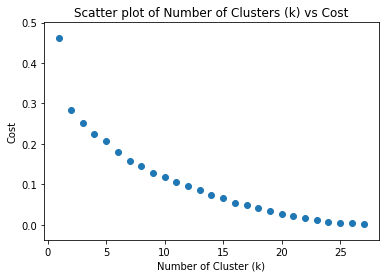

In [292]:
#plot cost values of k's as calculated above, to find best k value ('elbow')
plt.scatter(best_k['k'],best_k['Cost'])
plt.title("Scatter plot of Number of Clusters (k) vs Cost")
plt.ylabel("Cost")
plt.xlabel("Number of Cluster (k)")
plt.show

In [307]:
# Run K-means to break up into cluster (elbow at k = 7)
kclusters = 7

sg_grouped_clustering = sg_grouped.drop('District', 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sg_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100]

array([5, 2, 6, 3, 0, 0, 1, 3, 3, 5, 2, 2, 0, 0, 4, 3, 2, 1, 1, 1, 3, 5,
       0, 5, 1, 5, 6, 6], dtype=int32)

In [308]:
district_venues_sorted.columns

Index(['District', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue',
       '11th Most Common Venue', '12th Most Common Venue',
       '13th Most Common Venue', '14th Most Common Venue',
       '15th Most Common Venue', '16th Most Common Venue',
       '17th Most Common Venue', '18th Most Common Venue',
       '19th Most Common Venue', '20th Most Common Venue'],
      dtype='object')

#### Now we can stich the cluster labels back into our dataframe and also combine district location data. With all this info combined we'll be ready to visualize the results.

In [309]:
# Create dataframe that includes the cluster and top 20 venues

# Add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sg_merged = df_sg

# Merge df_sg with sg_veg to add Vegetarian / Vegan Restaurant mean value
sg_merged = sg_merged.join(sg_veg.set_index('Location'), on='Location')

# Merge sg_grouped with sg_data to add latitude/longitude for each district
sg_merged = sg_merged.join(district_venues_sorted.set_index('District'), on='Location')

sg_merged.head(28)

,District,Area,Location,Latitude,Longitude,Vegetarian / Vegan Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,1,Marina Area,"Boat Quay, SG",1.28747,103.849,0.01,3,Hotel,Waterfront,Japanese Restaurant,Event Space,Park,Shopping Mall,Spanish Restaurant,Ice Cream Shop,Beer Garden,Restaurant,Gym,Cocktail Bar,Performing Arts Venue,Coffee Shop,Gym / Fitness Center,Plaza,Wine Bar,Yoga Studio,Whisky Bar,Brewery
1,2,CBD,"Anson Road, SG",1.27663,103.847,0.01,3,Hotel,Waterfront,Japanese Restaurant,Spanish Restaurant,Coffee Shop,Gym,Boutique,Restaurant,Bookstore,Café,Gym / Fitness Center,Beer Garden,Cocktail Bar,Performing Arts Venue,Korean Restaurant,Garden,Event Space,Yoga Studio,Wine Bar,Italian Restaurant
2,3,Central South,"Alexandra Road, SG",1.2839,103.802,0.00,2,Chinese Restaurant,Park,Café,Japanese Restaurant,Seafood Restaurant,Scenic Lookout,Trail,Boutique,Resort,Cocktail Bar,Coffee Shop,Performing Arts Venue,Food Court,Bar,Modern European Restaurant,Italian Restaurant,Asian Restaurant,Gym / Fitness Center,Greek Restaurant,Gourmet Shop
3,4,Keppel,"Keppel, SG",1.27484,103.83,0.01,3,Hotel,Japanese Restaurant,Yoga Studio,Café,Spanish Restaurant,Coffee Shop,Gym,Park,Salad Place,Korean Restaurant,Theme Park Ride / Attraction,Gym / Fitness Center,Scenic Lookout,Art Gallery,Cocktail Bar,Harbor / Marina,Waterfront,Wine Bar,Bookstore,Beer Garden
4,5,South West,"Buona Vista, SG",1.30661,103.791,0.00,2,Bakery,French Restaurant,Ice Cream Shop,Garden,Chinese Restaurant,Pizza Place,Italian Restaurant,Coffee Shop,Park,Performing Arts Venue,Café,Japanese Restaurant,Malay Restaurant,Food Court,Seafood Restaurant,Bar,Indian Restaurant,Gourmet Shop,Asian Restaurant,Gym / Fitness Center
5,6,City Hall,"City Hall, SG",1.29303,103.853,0.01,3,Hotel,Japanese Restaurant,Waterfront,Event Space,Shopping Mall,Cocktail Bar,Performing Arts Venue,Park,Bistro,Movie Theater,French Restaurant,Plaza,Italian Restaurant,Whisky Bar,Wine Bar,Art Gallery,Soup Place,Gaming Cafe,Shopping Plaza,Garden
6,7,Beach Road,"Beach Road, SG",1.30305,103.862,0.00,3,Hotel,Event Space,Waterfront,Shopping Mall,Japanese Restaurant,Park,Indian Restaurant,Cocktail Bar,Coffee Shop,Lounge,Garden,Botanical Garden,Performing Arts Venue,Plaza,Supermarket,Ice Cream Shop,Italian Restaurant,Art Gallery,Movie Theater,Whisky Bar
7,8,Little India,"Little India, SG",1.30684,103.849,0.00,0,Hotel,Shopping Mall,Japanese Restaurant,Coffee Shop,Whisky Bar,Cosmetics Shop,Movie Theater,Café,Cocktail Bar,Performing Arts Venue,Sushi Restaurant,Park,Dessert Shop,Indian Restaurant,Wine Bar,Ice Cream Shop,Art Gallery,Yoga Studio,Italian Restaurant,Bubble Tea Shop
8,9,Orchard,"Cairnhill, SG",1.30656,103.839,0.01,0,Hotel,Japanese Restaurant,Shopping Mall,Cosmetics Shop,Park,Whisky Bar,Cocktail Bar,Indian Restaurant,Sushi Restaurant,Dessert Shop,Coffee Shop,Café,Clothing Store,Art Gallery,Yoga Studio,Wine Bar,Performing Arts Venue,Italian Restaurant,Shopping Plaza,Seafood Restaurant
9,10,Tanglin,"Balmoral, SG",1.31511,103.828,0.00,0,Hotel,Japanese Restaurant,Shopping Mall,Sushi Restaurant,Bakery,Clothing Store,Cocktail Bar,Café,Cosmetics Shop,Coffee Shop,Garden,Wine Bar,Seafood Restaurant,Dessert Shop,Movie Theater,Dumpling Restaurant,Yoga Studio,Bar,Chinese Restaurant,Modern European Restaurant


Now we're ready to map out the data to get a feel for the results. We'll use the Python Folium library to render our clusters, using a distinct color for each.

In [348]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, district, cluster in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['District'], sg_merged['Cluster Labels']):
    cluster = int(cluster)
    label = folium.Popup(str(district) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color="grey", 
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 8. Examine Clusters

#### Intuitively the results seem promising, in terms of holding some patterns about our dataset. The clusters seem generally dispersed geographically and balanced in terms of member count. Let's examine the individual clusters to try and discern how/why they broke out the way they did.

In [311]:
# Cluster 0 (tourist district in Singapore surrounded by hotels, shopping malls, and different types of restaurants including Vegetarian / Vegan)
sg_merged.loc[sg_merged['Cluster Labels'] == 0, sg_merged.columns[[0] + [1] + list(range(5, sg_merged.shape[1]))]]

,District,Area,Vegetarian / Vegan Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
7,8,Little India,0.00,0,Hotel,Shopping Mall,Japanese Restaurant,Coffee Shop,Whisky Bar,Cosmetics Shop,Movie Theater,Café,Cocktail Bar,Performing Arts Venue,Sushi Restaurant,Park,Dessert Shop,Indian Restaurant,Wine Bar,Ice Cream Shop,Art Gallery,Yoga Studio,Italian Restaurant,Bubble Tea Shop
8,9,Orchard,0.01,0,Hotel,Japanese Restaurant,Shopping Mall,Cosmetics Shop,Park,Whisky Bar,Cocktail Bar,Indian Restaurant,Sushi Restaurant,Dessert Shop,Coffee Shop,Café,Clothing Store,Art Gallery,Yoga Studio,Wine Bar,Performing Arts Venue,Italian Restaurant,Shopping Plaza,Seafood Restaurant
9,10,Tanglin,0.00,0,Hotel,Japanese Restaurant,Shopping Mall,Sushi Restaurant,Bakery,Clothing Store,Cocktail Bar,Café,Cosmetics Shop,Coffee Shop,Garden,Wine Bar,Seafood Restaurant,Dessert Shop,Movie Theater,Dumpling Restaurant,Yoga Studio,Bar,Chinese Restaurant,Modern European Restaurant
10,11,Newton,0.01,0,Hotel,Japanese Restaurant,Shopping Mall,Bakery,Cocktail Bar,Sushi Restaurant,Chinese Restaurant,Clothing Store,Cosmetics Shop,Park,Bar,Dessert Shop,Dumpling Restaurant,Coffee Shop,Movie Theater,French Restaurant,Garden,Boutique,Supermarket,Hotpot Restaurant
11,12,Toa Payoh,0.01,0,Hotel,Coffee Shop,Supermarket,Japanese Restaurant,Shopping Mall,Bakery,Clothing Store,Cocktail Bar,Cosmetics Shop,Ice Cream Shop,Sushi Restaurant,Dessert Shop,Pool,Chinese Restaurant,Seafood Restaurant,Flower Shop,Snack Place,Indian Restaurant,Whisky Bar,Boutique


In [312]:
# Cluster 1 (east area of singapore surrounded by coffee shop, cafe, and different types of restaurants including Vegetarian / Vegan)
sg_merged.loc[sg_merged['Cluster Labels'] == 1, sg_merged.columns[[0] + [1] + list(range(5, sg_merged.shape[1]))]]

,District,Area,Vegetarian / Vegan Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
12,13,Central East,0.02,1,Chinese Restaurant,Hotel,Food Court,BBQ Joint,Café,Coffee Shop,Ice Cream Shop,Dessert Shop,Asian Restaurant,Soup Place,Snack Place,Clothing Store,Thai Restaurant,Supermarket,Climbing Gym,Pool,Restaurant,Convenience Store,Seafood Restaurant,Park
13,14,Eunos,0.02,1,Chinese Restaurant,Coffee Shop,Noodle House,Food Court,Bar,BBQ Joint,Asian Restaurant,Dessert Shop,Italian Restaurant,Hotel,Vegetarian / Vegan Restaurant,Bakery,Climbing Gym,Japanese Restaurant,Beach,Vietnamese Restaurant,Café,French Restaurant,Middle Eastern Restaurant,Mexican Restaurant
14,15,East Coast,0.02,1,Chinese Restaurant,Coffee Shop,Noodle House,Bar,Dessert Shop,Hotel,BBQ Joint,Food Court,Italian Restaurant,Asian Restaurant,Beach,Vegetarian / Vegan Restaurant,Café,Yoga Studio,Bakery,Sporting Goods Shop,Japanese Restaurant,Multiplex,Park,Vietnamese Restaurant
15,16,Upper East Coast,0.01,1,Chinese Restaurant,Coffee Shop,Dessert Shop,Café,Beach,Food Court,Bakery,Ice Cream Shop,Asian Restaurant,Seafood Restaurant,Indian Restaurant,Park,Italian Restaurant,Hotel,Pizza Place,Supermarket,American Restaurant,Sporting Goods Shop,Yoga Studio,Thai Restaurant
18,19,North East,0.03,1,Chinese Restaurant,Coffee Shop,Café,Dessert Shop,Bakery,Asian Restaurant,Noodle House,Ice Cream Shop,Trail,Thai Restaurant,Supermarket,Park,Vegetarian / Vegan Restaurant,Food Court,Italian Restaurant,Clothing Store,Diner,Breakfast Spot,Fish & Chips Shop,Pizza Place


In [313]:
# Cluster 2 (west area of singapore surrounded by bakery, cafe, park, and different types of restaurants including Vegetarian / Vegan)
sg_merged.loc[sg_merged['Cluster Labels'] == 2, sg_merged.columns[[0] + [1] + list(range(5, sg_merged.shape[1]))]]

,District,Area,Vegetarian / Vegan Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
2,3,Central South,0.00,2,Chinese Restaurant,Park,Café,Japanese Restaurant,Seafood Restaurant,Scenic Lookout,Trail,Boutique,Resort,Cocktail Bar,Coffee Shop,Performing Arts Venue,Food Court,Bar,Modern European Restaurant,Italian Restaurant,Asian Restaurant,Gym / Fitness Center,Greek Restaurant,Gourmet Shop
4,5,South West,0.00,2,Bakery,French Restaurant,Ice Cream Shop,Garden,Chinese Restaurant,Pizza Place,Italian Restaurant,Coffee Shop,Park,Performing Arts Venue,Café,Japanese Restaurant,Malay Restaurant,Food Court,Seafood Restaurant,Bar,Indian Restaurant,Gourmet Shop,Asian Restaurant,Gym / Fitness Center
20,21,Central West,0.00,2,Bakery,Japanese Restaurant,Indian Restaurant,Park,Chinese Restaurant,Italian Restaurant,Dessert Shop,French Restaurant,Food Court,Pizza Place,Café,Ice Cream Shop,Trail,Coffee Shop,Multiplex,Performing Arts Venue,Playground,Thai Restaurant,Kitchen Supply Store,Korean Restaurant
22,23,North West,0.02,2,Chinese Restaurant,Bakery,Coffee Shop,Japanese Restaurant,Food Court,Park,Supermarket,Nature Preserve,Indian Restaurant,Italian Restaurant,Asian Restaurant,Bistro,Scenic Lookout,Vegetarian / Vegan Restaurant,Ice Cream Shop,Trail,Department Store,Dessert Shop,Bowling Alley,BBQ Joint


In [314]:
# Cluster 3 (central business district area of singapore surrounded by hotel, cafe, and different types of restaurants including Vegetarian / Vegan)
sg_merged.loc[sg_merged['Cluster Labels'] == 3, sg_merged.columns[[0] + [1] + list(range(5,sg_merged.shape[1]))]]

,District,Area,Vegetarian / Vegan Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,1,Marina Area,0.01,3,Hotel,Waterfront,Japanese Restaurant,Event Space,Park,Shopping Mall,Spanish Restaurant,Ice Cream Shop,Beer Garden,Restaurant,Gym,Cocktail Bar,Performing Arts Venue,Coffee Shop,Gym / Fitness Center,Plaza,Wine Bar,Yoga Studio,Whisky Bar,Brewery
1,2,CBD,0.01,3,Hotel,Waterfront,Japanese Restaurant,Spanish Restaurant,Coffee Shop,Gym,Boutique,Restaurant,Bookstore,Café,Gym / Fitness Center,Beer Garden,Cocktail Bar,Performing Arts Venue,Korean Restaurant,Garden,Event Space,Yoga Studio,Wine Bar,Italian Restaurant
3,4,Keppel,0.01,3,Hotel,Japanese Restaurant,Yoga Studio,Café,Spanish Restaurant,Coffee Shop,Gym,Park,Salad Place,Korean Restaurant,Theme Park Ride / Attraction,Gym / Fitness Center,Scenic Lookout,Art Gallery,Cocktail Bar,Harbor / Marina,Waterfront,Wine Bar,Bookstore,Beer Garden
5,6,City Hall,0.01,3,Hotel,Japanese Restaurant,Waterfront,Event Space,Shopping Mall,Cocktail Bar,Performing Arts Venue,Park,Bistro,Movie Theater,French Restaurant,Plaza,Italian Restaurant,Whisky Bar,Wine Bar,Art Gallery,Soup Place,Gaming Cafe,Shopping Plaza,Garden
6,7,Beach Road,0.00,3,Hotel,Event Space,Waterfront,Shopping Mall,Japanese Restaurant,Park,Indian Restaurant,Cocktail Bar,Coffee Shop,Lounge,Garden,Botanical Garden,Performing Arts Venue,Plaza,Supermarket,Ice Cream Shop,Italian Restaurant,Art Gallery,Movie Theater,Whisky Bar


In [316]:
# Cluster 4 (far east area of singapore near airport)
sg_merged.loc[sg_merged['Cluster Labels'] == 4, sg_merged.columns[[0] + [1] + list(range(5, sg_merged.shape[1]))]]

,District,Area,Vegetarian / Vegan Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
16,17,Far East,0.0,4,Airport Lounge,Café,Golf Course,Boutique,General Entertainment,Asian Restaurant,Coffee Shop,Candy Store,Canal,Supermarket,Electronics Store,Hotel,Airport,Housing Development,Hobby Shop,Smoke Shop,Burger Joint,Garden,Ice Cream Shop,Shoe Store


In [317]:
# Cluster 5 (far north west area + north east of singapore surrounded by coffee shop, cafe, food court, and different kind of restaurants excluding Vegetarian / Vegan)
sg_merged.loc[sg_merged['Cluster Labels'] == 5, sg_merged.columns[[0] + [1] + list(range(5, sg_merged.shape[1]))]]

,District,Area,Vegetarian / Vegan Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
17,18,Tampines,0.0,5,Coffee Shop,Park,Café,Bakery,Thai Restaurant,Supermarket,Furniture / Home Store,Gym,Japanese Restaurant,Fast Food Restaurant,Food Court,Steakhouse,Dessert Shop,Fried Chicken Joint,Clothing Store,Asian Restaurant,Grocery Store,Seafood Restaurant,Scandinavian Restaurant,Sandwich Place
21,22,Far West,0.0,5,Fast Food Restaurant,Chinese Restaurant,Food Court,Coffee Shop,Asian Restaurant,Sandwich Place,Zoo Exhibit,Exhibit,Café,Supermarket,Garden,Japanese Restaurant,Noodle House,Park,Pool,Seafood Restaurant,Shopping Mall,Indian Restaurant,Bookstore,Snack Place
23,24,Far North West,0.0,5,Café,Coffee Shop,Chinese Restaurant,Sandwich Place,Park,Malay Restaurant,Clothing Store,Ice Cream Shop,Zoo,Food Court,Frozen Yogurt Shop,Japanese Restaurant,Juice Bar,Indian Restaurant,Boutique,Snack Place,Bakery,Hainan Restaurant,Monument / Landmark,Movie Theater
24,25,Far North,0.0,5,Chinese Restaurant,Coffee Shop,Park,Food Court,Bar,Indian Restaurant,Fast Food Restaurant,Thai Restaurant,Asian Restaurant,Supermarket,Nightclub,Clothing Store,Café,Sandwich Place,Malay Restaurant,Frozen Yogurt Shop,Seafood Restaurant,Exhibit,Bistro,American Restaurant
27,28,North East,0.0,5,Food Court,Coffee Shop,Café,Fast Food Restaurant,Supermarket,Sandwich Place,Park,Asian Restaurant,Noodle House,Chinese Restaurant,Japanese Restaurant,Bar,Pool,Sushi Restaurant,Restaurant,Seafood Restaurant,Shopping Mall,Diner,Bridge,Club House


In [318]:
# Cluster 6 (north area of singapore surrounded by coffee shop, cafe, food court, park and different kind of restaurants including Vegetarian / Vegan)
sg_merged.loc[sg_merged['Cluster Labels'] == 6, sg_merged.columns[[0] + [1] + list(range(5, sg_merged.shape[1]))]]

,District,Area,Vegetarian / Vegan Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
19,20,Ang Mo Kio,0.01,6,Chinese Restaurant,Food Court,Park,Café,Coffee Shop,Supermarket,Ice Cream Shop,Spa,Noodle House,Asian Restaurant,BBQ Joint,Clothing Store,Thai Restaurant,Bakery,Trail,Italian Restaurant,Seafood Restaurant,Gym,Dessert Shop,Diner
25,26,North,0.01,6,Chinese Restaurant,Café,Park,Coffee Shop,Food Court,Thai Restaurant,Supermarket,Spa,Pool,Indian Restaurant,BBQ Joint,Sushi Restaurant,Golf Course,Ice Cream Shop,Restaurant,Bakery,Noodle House,Asian Restaurant,Gym,Lake
26,27,Far North,0.02,6,Coffee Shop,Chinese Restaurant,Park,Asian Restaurant,Indian Restaurant,Seafood Restaurant,Food Court,Sandwich Place,Supermarket,Thai Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Café,Fast Food Restaurant,American Restaurant,Karaoke Bar,Hainan Restaurant,Furniture / Home Store,College Theater,Hot Spring


## Results <a name="results"></a>

k-means clustering produced 7 clusters as follow

Cluster 0 (tourist district in Singapore surrounded by hotels, shopping malls, and different types of restaurants including Vegetarian / Vegan)

Cluster 1 (east area of singapore surrounded by coffee shop, cafe, and different types of restaurants including Vegetarian / Vegan)

Cluster 2 (west area of singapore surrounded by bakery, cafe, park, and different types of restaurants including Vegetarian / Vegan)

Cluster 3 (central business district area of singapore surrounded by hotel, cafe, and different types of restaurants including Vegetarian / Vegan)

Cluster 4 (far east area of singapore near airport)

Cluster 5 (far north west area + north east of singapore surrounded by coffee shop, cafe, food court, and different kind of restaurants excluding Vegetarian / Vegan)

Cluster 6 (north area of singapore surrounded by coffee shop, cafe, food court, park and different kind of restaurants including Vegetarian / Vegan)


## Discussion an Recommendation <a name="recommendation"></a>

Based on the clustering result above. I will recommend entrepreneur to focus on cluster 5 which are far north west areas without much presence of vegetarian / vegan restaurants.

1) District 18 (Pasir Ris, Simei, Tampines)

District 18 consists of Simei, Tampines and Pasir Ris – residential areas with numerous amenities and facilities within the vicinity. A great and convenient place to live, it is located in the eastern part of Singapore.

2) District 22 (Boon Lay, Jurong, Tuas)

Located to the West of Singapore, District 22 is mainly an industrial and residential area with landscaped parks. In this District you can also find a golf course and Singapore’s only ice-skating rink. District 22 comprises of Boon Lay, Jurong and Tuas. It is densely populated with many industrial buildings, contributing to Singapore’s booming economy.

3) District 24 - Kranji, Lim Chu Kang, Tengah

Located in the northwestern part of Singapore, District 24 is occupied fully by Lim Chu Kang. This area is characterized by its abundant foliage, the few remaining farms in Singapore, a jetty, a forest reserve, numerous campsites and cemeteries. 

4) District 25 (Admiralty, Woodlands)

From District 25’s Woodlands, you can actually see Malaysia. There is the Causeway bridge which links Singapore and Malaysia together. District 25’s Kranji is an industrial area with a rich cultural history and the location of Singapore’s only racecourse.

5) District 28 - Yio Chu Kang, Seletar

Comprising of Seletar and part of Yio Chu Kang of District 26, District 28 is a historical and residential area that holds many heritage and cultural stories. The British naval and air bases used to be located here. In the future, the Seletar Aerospace Park will be built to serve Singapore’s aviation industries.



## Conclusion <a name="conclusion"></a>

In this project, we have gone through the process of identifying the business problem, specifying the data required, extracting and preparing the data, performing machine learning by clustering the data into 7 clusters based on their similarities, and lastly providing recommendations to entreprenuer regarding the best locations to open a new vegetarian / vegan restaurant. To answer the business question that was raised in the introduction section, the answer proposed by this project is the districts in cluster 5 are the most preferred locations to open a new vegetarian / vegan restaurant. The findings of this project will help the entrepreneur to capitalize on the opportunities on high potential locations while avoiding overcrowded areas in their decisions to open a new vegetarian / vegan restaurant.

## Limitation and Future Work <a name="limitation"></a>

In this project, we only consider one factor i.e. frequency of occurrence of vegetarian / vegan restaurant, there are other factors such as population, race, religion and income of residents that could influence the location decision of a new vegetarian / vegan resutants. However, to the best knowledge of this researcher such data are not available to the district level required by this project. Future research could devise a methodology to estimate such data to be used in the clustering algorithm to determine the preferred locations to open a new vegetarian / vegan restaurant. In addition, this project made use of the free Sandbox Tier Account of Foursquare API that came with limitations as to the number of API calls and results returned. Future research could make use of paid account to bypass these limitations and obtain more results.

## References <a name="references"></a>

https://thehoneycombers.com/singapore/vegan-scene-in-singapore/

https://www.todayonline.com/daily-focus/veganism-gaining-ground-singapore

https://www.asiaone.com/lifestyle/can-you-save-money-becoming-vegetarian-singapore

https://www.petaasia.com/living/food/top-10-vegan-friendly-cities-asia/

https://www.happycow.net/asia/singapore/?filters=vegan-vegetarian

https://www.happycow.net/veggiemap/?location=singapore&filters=vegan-vegetarian&zoom=5&clat=1.3147307000000001&clng=103.84701910000001

https://www.iproperty.com.sg/resources/District_Guide.aspx

https://keylocation.sg/singapore/districts-map

https://developer.foursquare.com/docs
